<a href="https://colab.research.google.com/github/glazedonut/IEClusteingAnalysisProject/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roka Hosono, Veda Upasan Pedagadi, Jahnavi Chowdary Tumati
11/7/2022
Project 1: Cluster Analysis


Task 1:

In [67]:
#RUN THIS CELL
!python data_cleaner.py

['Europe', 'Africa', 'Middle East', 'Asia', 'Oceania', 'The Americas']
Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region                    0
Country                   0
dtype: int64


C:\Users\hoson\OneDrive\Desktop\Clustering Project\data_cleaner.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  world['GDP'] = world['GDP'].str.replace('$', '')
C:\Users\hoson\OneDrive\Desktop\Clustering Project\data_cleaner.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world[world.columns.values[i]].loc[world["Region"]==j]=world[world.columns.values[i]].loc[world["Region"]==j].replace(np.NaN,world[world.columns.values[i]].loc[world["Region"]==j].median())


Number of Classes: 7
f1 score for K means : 1.0
Accuracy Score for  K means : 1.0
Fowlkes Mallows Score for  K means : 1.0
f1 score for Hierarchal Clustering : 1.0
Accuracy Score for  Hierarchal Clustering : 1.0
Fowlkes Mallows Score for  Hierarchal Clustering : 1.0


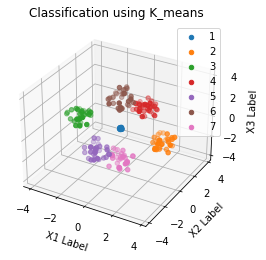

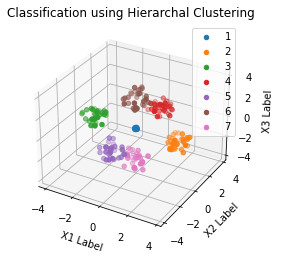

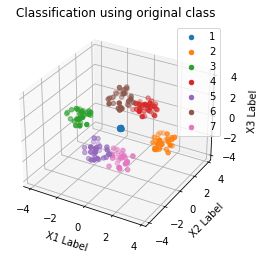

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import accuracy_score, f1_score
#first commit
def create_K_meanselbow_task1(file): #K means classification
    data=pd.read_csv(file)
    coordinates=data[[data.columns[1],data.columns[2],data.columns[3]]]
    dydx=[]
    numclass=max(list(data['Class']))
    print('Number of Classes:',numclass)
    opt_k=KMeans(n_clusters=numclass, random_state=1)
    metrics=opt_k.fit_predict(coordinates)
    data['cluster_class']=metrics
    
    return data

def create_hiearchal_Classification_task1(file):
    data=pd.read_csv(file)
      
    coordinates=data.iloc[:,1:4]
    numclass=max(list(data['Class']))
    clusters=AgglomerativeClustering(n_clusters=numclass,affinity='euclidean',linkage='ward')
    
    data['cluster_class']=clusters.fit_predict(coordinates)
    
    return data

def validate_Supervised(data, method='K means'):
    acc=accuracy_score(data['Class'],data['cluster_class'])
    fowlkes=fowlkes_mallows_score(data['Class'],data['cluster_class'])
    f1=f1_score(data['Class'],data['cluster_class'],average='weighted')
    print('f1 score for',method,':',f1)
    print("Accuracy Score for ",method,':',mut)
    print("Fowlkes Mallows Score for ",method,':',fowlkes)
   
    
def create_3dscatter(data,method="K_means"):    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Classification using "+method)
    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        ax.scatter(data2[data.columns[1]], data2[data.columns[2]], data2[data.columns[3]],label=i)
    ax.set_xlabel(data.columns[1]+' Label')
    ax.set_ylabel(data.columns[2]+' Label')
    ax.set_zlabel(data.columns[3]+' Label')
    ax.legend()    

def create_original_3dscatter_task1(data):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.set_title("Classification using original class")
    for i in data['Class'].unique():
        data2=data.loc[data['Class']==i]
        ax2.scatter(data2[data.columns[1]], data2[data.columns[2]], data2[data.columns[3]],label=i)
    ax2.set_xlabel(data.columns[1]+' Label')
    ax2.set_ylabel(data.columns[2]+' Label')
    ax2.set_zlabel(data.columns[3]+' Label')
    ax2.legend()



k_means=create_K_meanselbow_task1("data/data1.csv")
k_means['cluster_class'] = k_means['cluster_class'].replace(6, 'a')
k_means['cluster_class'] = k_means['cluster_class'].replace(0, 'b')
k_means['cluster_class'] = k_means['cluster_class'].replace(1, 'c')
k_means['cluster_class'] = k_means['cluster_class'].replace(4, 'd')
k_means['cluster_class'] = k_means['cluster_class'].replace(2, 'e')
k_means['cluster_class'] = k_means['cluster_class'].replace(3, 'f')
k_means['cluster_class'] = k_means['cluster_class'].replace(5, 'g')
k_means['cluster_class'] = k_means['cluster_class'].replace('a', 1)
k_means['cluster_class'] = k_means['cluster_class'].replace('b', 2)
k_means['cluster_class'] = k_means['cluster_class'].replace('c', 3)
k_means['cluster_class'] = k_means['cluster_class'].replace('d', 4)
k_means['cluster_class'] = k_means['cluster_class'].replace('e', 5)
k_means['cluster_class'] = k_means['cluster_class'].replace('f', 6)
k_means['cluster_class'] = k_means['cluster_class'].replace('g', 7)
validate_Supervised(k_means)
create_3dscatter(k_means)
#call function for hiearchal classification here just like create_kmeanselbow_task1
hier=create_hiearchal_Classification_task1("data/data1.csv")

hier['cluster_class'] = hier['cluster_class'].replace(6, 'a')
hier['cluster_class'] = hier['cluster_class'].replace(4, 'b')
hier['cluster_class'] = hier['cluster_class'].replace(2, 'c')
hier['cluster_class'] = hier['cluster_class'].replace(5, 'd')
hier['cluster_class'] = hier['cluster_class'].replace(1, 'e')
hier['cluster_class'] = hier['cluster_class'].replace(0, 'f')
hier['cluster_class'] = hier['cluster_class'].replace(3, 'g')
hier['cluster_class'] = hier['cluster_class'].replace('a', 1)
hier['cluster_class'] = hier['cluster_class'].replace('b', 2)
hier['cluster_class'] = hier['cluster_class'].replace('c', 3)
hier['cluster_class'] = hier['cluster_class'].replace('d', 4)
hier['cluster_class'] = hier['cluster_class'].replace('e', 5)
hier['cluster_class'] = hier['cluster_class'].replace('f', 6)
hier['cluster_class'] = hier['cluster_class'].replace('g', 7)
create_3dscatter(hier, "Hierarchal Clustering")
validate_Supervised(hier,"Hierarchal Clustering")
create_original_3dscatter_task1(pd.read_csv("data/data1.csv"))


Number of Classes: 4
f1 score for K means : 0.33968193089267723
Accuracy Score for  K means : 0.725466545289371
Fowlkes Mallows Score for  K means : 0.7237292929817782
f1 score for Hierarchal Clustering : 0.2539659170378004
Accuracy Score for  Hierarchal Clustering : 0.8524992516385661
Fowlkes Mallows Score for  Hierarchal Clustering : 0.8267843729687627


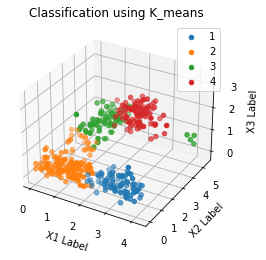

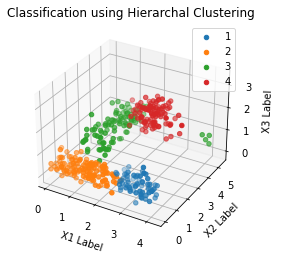

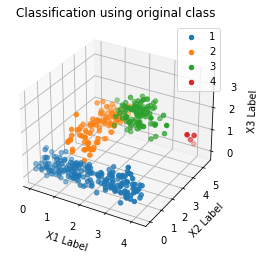

In [69]:
k_means=create_K_meanselbow_task1("data/data2.csv")
k_means['cluster_class'] = k_means['cluster_class'].replace(2, 'a')
k_means['cluster_class'] = k_means['cluster_class'].replace(1, 'b')
k_means['cluster_class'] = k_means['cluster_class'].replace(3, 'c')
k_means['cluster_class'] = k_means['cluster_class'].replace(0, 'd')
k_means['cluster_class'] = k_means['cluster_class'].replace('a', 1)
k_means['cluster_class'] = k_means['cluster_class'].replace('b', 2)
k_means['cluster_class'] = k_means['cluster_class'].replace('c', 3)
k_means['cluster_class'] = k_means['cluster_class'].replace('d', 4)
validate_Supervised(k_means)
create_3dscatter(k_means)

#call function for hiearchal classification here just like create_kmeanselbow_task1
hier=create_hiearchal_Classification_task1("data/data2.csv")
hier['cluster_class'] = hier['cluster_class'].replace(3, 'a')
hier['cluster_class'] = hier['cluster_class'].replace(1, 'b')
hier['cluster_class'] = hier['cluster_class'].replace(0, 'c')
hier['cluster_class'] = hier['cluster_class'].replace(2, 'd')
hier['cluster_class'] = hier['cluster_class'].replace('a', 1)
hier['cluster_class'] = hier['cluster_class'].replace('b', 2)
hier['cluster_class'] = hier['cluster_class'].replace('c', 3)
hier['cluster_class'] = hier['cluster_class'].replace('d', 4)
validate_Supervised(hier,"Hierarchal Clustering")
create_3dscatter(hier, "Hierarchal Clustering")
create_original_3dscatter_task1(pd.read_csv("data/data2.csv"))

Number of Classes: 4
f1 score for K means : 1.0
Accuracy Score for  K means : 1.0
Fowlkes Mallows Score for  K means : 1.0
f1 score for Hierarchal Clustering : 0.9874921826141337
Accuracy Score for  Hierarchal Clustering : 0.9639667391957355
Fowlkes Mallows Score for  Hierarchal Clustering : 0.9753945158961902


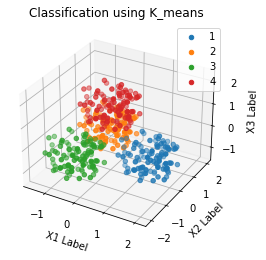

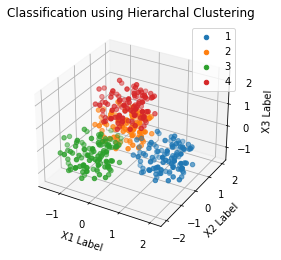

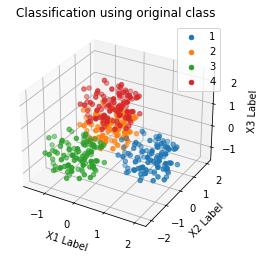

In [70]:
k_means=create_K_meanselbow_task1("data/data3.csv")
k_means['cluster_class'] = k_means['cluster_class'].replace(0, 'a')
k_means['cluster_class'] = k_means['cluster_class'].replace(2, 'b')
k_means['cluster_class'] = k_means['cluster_class'].replace(3, 'c')
k_means['cluster_class'] = k_means['cluster_class'].replace(1, 'd')
k_means['cluster_class'] = k_means['cluster_class'].replace('a', 1)
k_means['cluster_class'] = k_means['cluster_class'].replace('b', 2)
k_means['cluster_class'] = k_means['cluster_class'].replace('c', 3)
k_means['cluster_class'] = k_means['cluster_class'].replace('d', 4)
validate_Supervised(k_means)
create_3dscatter(k_means)
#call function for hiearchal classification here just like create_kmeanselbow_task1
hier=create_hiearchal_Classification_task1("data/data3.csv")
hier['cluster_class'] = hier['cluster_class'].replace(1, 'a')
hier['cluster_class'] = hier['cluster_class'].replace(3, 'b')
hier['cluster_class'] = hier['cluster_class'].replace(0, 'c')
hier['cluster_class'] = hier['cluster_class'].replace(2, 'd')
hier['cluster_class'] = hier['cluster_class'].replace('a', 1)
hier['cluster_class'] = hier['cluster_class'].replace('b', 2)
hier['cluster_class'] = hier['cluster_class'].replace('c', 3)
hier['cluster_class'] = hier['cluster_class'].replace('d', 4)
validate_Supervised(hier,"Hierarchal Clustering")
create_3dscatter(hier, "Hierarchal Clustering")
create_original_3dscatter_task1(pd.read_csv("data/data3.csv"))

Number of Classes: 2
f1 score for K means : 0.6529996529996529
Accuracy Score for  K means : 0.06864017084884316
Fowlkes Mallows Score for  K means : 0.5459107296389125
f1 score for Hierarchal Clustering : 0.7905375057706395
Accuracy Score for  Hierarchal Clustering : 0.41914593721266324
Fowlkes Mallows Score for  Hierarchal Clustering : 0.7042423466085546


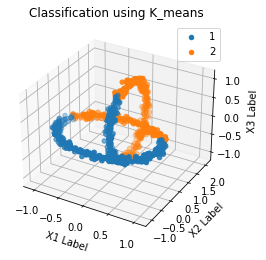

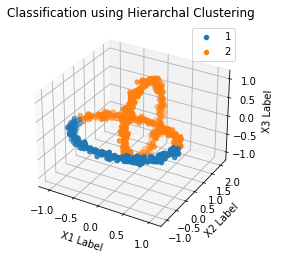

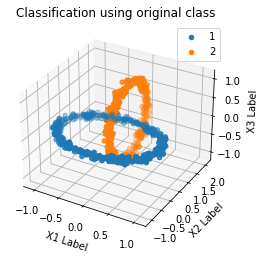

In [71]:
k_means=create_K_meanselbow_task1("data/data4.csv")
k_means['cluster_class'] = k_means['cluster_class'].replace(1, 'a')
k_means['cluster_class'] = k_means['cluster_class'].replace(0, 'b')
k_means['cluster_class'] = k_means['cluster_class'].replace('a', 1)
k_means['cluster_class'] = k_means['cluster_class'].replace('b', 2)

validate_Supervised(k_means)
create_3dscatter(k_means)
#call function for hiearchal classification here just like create_kmeanselbow_task1
hier=create_hiearchal_Classification_task1("data/data4.csv")
hier['cluster_class'] = hier['cluster_class'].replace(1, 'a')
hier['cluster_class'] = hier['cluster_class'].replace(0, 'b')
hier['cluster_class'] = hier['cluster_class'].replace('a', 1)
hier['cluster_class'] = hier['cluster_class'].replace('b', 2)

validate_Supervised(hier,"Hierarchal Clustering")
create_3dscatter(hier, "Hierarchal Clustering")
create_original_3dscatter_task1(pd.read_csv("data/data4.csv"))

Number of Classes: 2
f1 score for K means : 0.22027290448343081
Accuracy Score for  K means : 0.2981230883845461
Fowlkes Mallows Score for  K means : 0.6559262338078193
f1 score for Hierarchal Clustering : 0.6119832048204714
Accuracy Score for  Hierarchal Clustering : 0.2196955061119616
Fowlkes Mallows Score for  Hierarchal Clustering : 0.6462836986049043


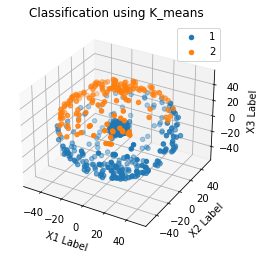

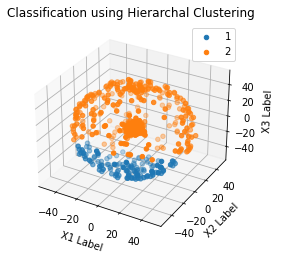

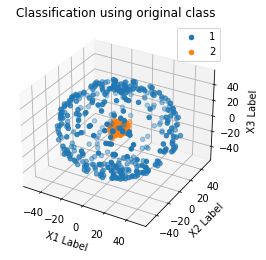

In [72]:
k_means=create_K_meanselbow_task1("data/data5.csv")
k_means['cluster_class'] = k_means['cluster_class'].replace(1, 'a')
k_means['cluster_class'] = k_means['cluster_class'].replace(0, 'b')
k_means['cluster_class'] = k_means['cluster_class'].replace('a', 1)
k_means['cluster_class'] = k_means['cluster_class'].replace('b', 2)
validate_Supervised(k_means)
create_3dscatter(k_means)
#call function for hiearchal classification here just like create_kmeanselbow_task1
hier=create_hiearchal_Classification_task1("data/data5.csv")
hier['cluster_class'] = hier['cluster_class'].replace(1, 'a')
hier['cluster_class'] = hier['cluster_class'].replace(0, 'b')
hier['cluster_class'] = hier['cluster_class'].replace('a', 1)
hier['cluster_class'] = hier['cluster_class'].replace('b', 2)
validate_Supervised(hier,"Hierarchal Clustering")
create_3dscatter(hier, "Hierarchal Clustering")
create_original_3dscatter_task1(pd.read_csv("data/data5.csv"))

Number of Classes: 2
f1 score for K means : 0.966292319762115
Accuracy Score for  K means : 0.798177556567209
Fowlkes Mallows Score for  K means : 0.9349189089650788
f1 score for Hierarchal Clustering : 0.9948729585579053
Accuracy Score for  Hierarchal Clustering : 0.9564054571220315
Fowlkes Mallows Score for  Hierarchal Clustering : 0.9897940338631375


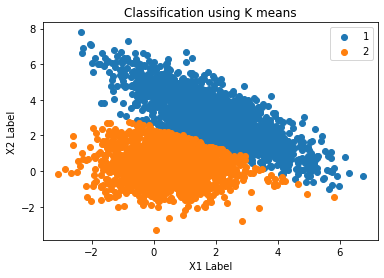

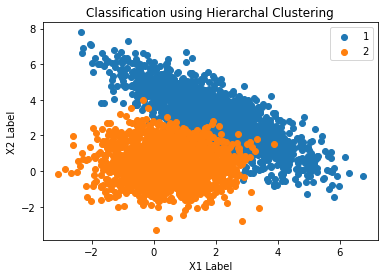

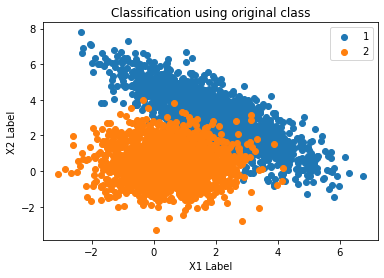

In [73]:
def create_2dscatter(data, method='K means'):    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("Classification using "+method)
    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        ax.scatter(data2[data.columns[1]], data2[data.columns[2]],label=i)
    ax.set_xlabel(data.columns[1]+' Label')
    ax.set_ylabel(data.columns[2]+' Label')
    ax.legend()    
def create_original_2dscatter_task1(data):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.set_title("Classification using original class")
    for i in data['Class'].unique():
        data2=data.loc[data['Class']==i]
        ax2.scatter(data2[data.columns[1]], data2[data.columns[2]],label=i)
    ax2.set_xlabel(data.columns[1]+' Label')
    ax2.set_ylabel(data.columns[2]+' Label')
    ax2.legend()
    
k_means=create_K_meanselbow_task1("data/data6.csv")
k_means['cluster_class'] = k_means['cluster_class'].replace(0, 'a')
k_means['cluster_class'] = k_means['cluster_class'].replace(1, 'b')
k_means['cluster_class'] = k_means['cluster_class'].replace('a', 1)
k_means['cluster_class'] = k_means['cluster_class'].replace('b', 2)
validate_Supervised(k_means)
create_2dscatter(k_means)
#call function for hiearchal classification here just like create_kmeanselbow_task1
hier=create_hiearchal_Classification_task1("data/data6.csv")
hier['cluster_class'] = hier['cluster_class'].replace(0, 'a')
hier['cluster_class'] = hier['cluster_class'].replace(1, 'b')
hier['cluster_class'] = hier['cluster_class'].replace('a', 1)
hier['cluster_class'] = hier['cluster_class'].replace('b', 2)
validate_Supervised(hier,"Hierarchal Clustering")
create_2dscatter(hier, "Hierarchal Clustering")
create_original_2dscatter_task1(pd.read_csv("data/data6.csv"))

Number of Classes: 6
f1 score for K means : 0.7164443812414772
Accuracy Score for  K means : 0.6751069587863571
Fowlkes Mallows Score for  K means : 0.8065161134153022
f1 score for Hierarchal Clustering : 0.7228891305738595
Accuracy Score for  Hierarchal Clustering : 0.6772108028497389
Fowlkes Mallows Score for  Hierarchal Clustering : 0.8083918458051556


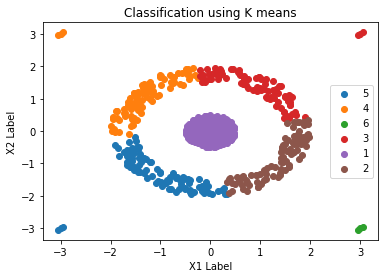

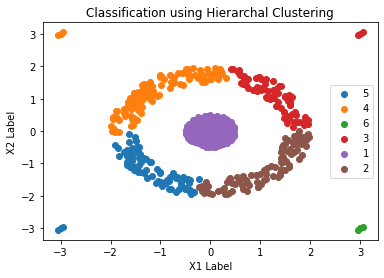

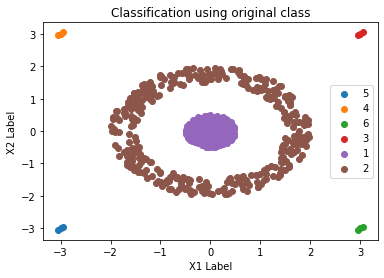

In [74]:
k_means=create_K_meanselbow_task1("data/data7.csv")
k_means['cluster_class'] = k_means['cluster_class'].replace(4, 'a')
k_means['cluster_class'] = k_means['cluster_class'].replace(3, 'b')
k_means['cluster_class'] = k_means['cluster_class'].replace(5, 'c')
k_means['cluster_class'] = k_means['cluster_class'].replace(2, 'd')
k_means['cluster_class'] = k_means['cluster_class'].replace(1, 'e')
k_means['cluster_class'] = k_means['cluster_class'].replace(0, 'f')

k_means['cluster_class'] = k_means['cluster_class'].replace('a', 5)
k_means['cluster_class'] = k_means['cluster_class'].replace('b', 4)
k_means['cluster_class'] = k_means['cluster_class'].replace('c', 6)
k_means['cluster_class'] = k_means['cluster_class'].replace('d', 3)
k_means['cluster_class'] = k_means['cluster_class'].replace('e', 1)
k_means['cluster_class'] = k_means['cluster_class'].replace('f', 2)

validate_Supervised(k_means)
create_2dscatter(k_means)
#call function for hiearchal classification here just like create_kmeanselbow_task1
hier=create_hiearchal_Classification_task1("data/data7.csv")
hier['cluster_class'] = hier['cluster_class'].replace(1, 'a')
hier['cluster_class'] = hier['cluster_class'].replace(0, 'b')
hier['cluster_class'] = hier['cluster_class'].replace(5, 'c')
hier['cluster_class'] = hier['cluster_class'].replace(4, 'd')
hier['cluster_class'] = hier['cluster_class'].replace(3, 'e')
hier['cluster_class'] = hier['cluster_class'].replace(2, 'f')
hier['cluster_class'] = hier['cluster_class'].replace('a', 5)
hier['cluster_class'] = hier['cluster_class'].replace('b', 4)
hier['cluster_class'] = hier['cluster_class'].replace('c', 6)
hier['cluster_class'] = hier['cluster_class'].replace('d', 3)
hier['cluster_class'] = hier['cluster_class'].replace('e', 1)
hier['cluster_class'] = hier['cluster_class'].replace('f', 2)

validate_Supervised(hier,"Hierarchal Clustering")
create_2dscatter(hier, "Hierarchal Clustering")
create_original_2dscatter_task1(pd.read_csv("data/data7.csv"))

Number of Classes: 1
f1 score for K means : 1.0
Accuracy Score for  K means : 1.0
Fowlkes Mallows Score for  K means : 1.0
f1 score for Hierarchal Clustering : 1.0
Accuracy Score for  Hierarchal Clustering : 1.0
Fowlkes Mallows Score for  Hierarchal Clustering : 1.0


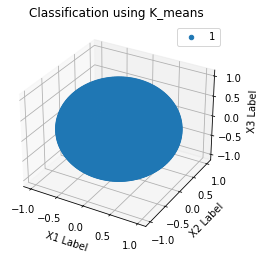

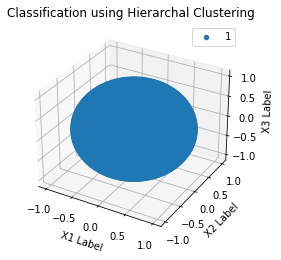

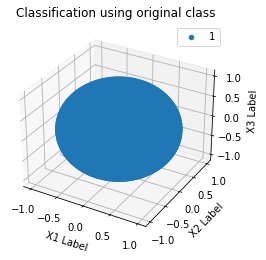

In [75]:
k_means=create_K_meanselbow_task1("data/data8.csv")
k_means['cluster_class'] = k_means['cluster_class'].replace(0, 'a')
k_means['cluster_class'] = k_means['cluster_class'].replace('a', 1)
validate_Supervised(k_means)
create_3dscatter(k_means)

#call function for hiearchal classification here just like create_kmeanselbow_task1
hier=create_hiearchal_Classification_task1("data/data8.csv")
hier['cluster_class'] = hier['cluster_class'].replace(0, 'a')
hier['cluster_class'] = hier['cluster_class'].replace('a', 1)
validate_Supervised(hier,"Hierarchal Clustering")
create_3dscatter(hier, "Hierarchal Clustering")
create_original_3dscatter_task1(pd.read_csv("data/data8.csv"))

Task 2:

Based on our world-indicators data, the K means clustering algorithm while gives us the worse validation scores out of the others, it groups together more countries as one class. Japan, china and the United States are commonly agreed upon to be the top 3 in GDP throughout recent years. This classification indicates that their economy is outstandingly better from the rest of the other countries. Whereas Hierarchal clustering only classified the US as one of the groups. While this may give us a better clustering toward the silhouette numbers, it doesnt actually give us enough information on the clustering and division of the countries. 

In [76]:
!pip install validclust

CH Ratio World Indicators Data for  K means : 500.1756566789292
Dunn Index World Indicators Data for  K means : 0.23654765768635952






List of countries classified as 0 from Kmeans
['China', 'Japan', 'United States']










List of countries classified as 1 from Kmeans
['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Banglade

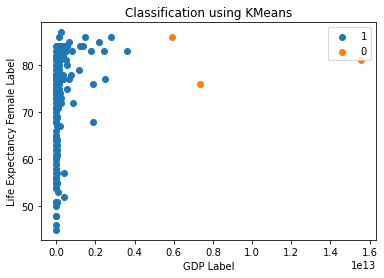

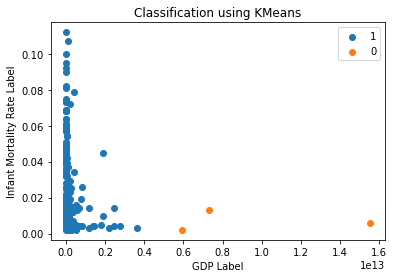

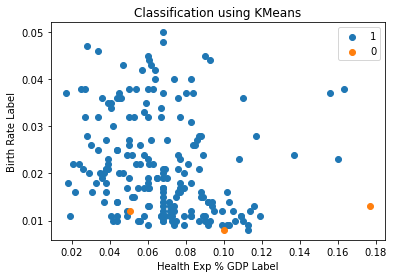

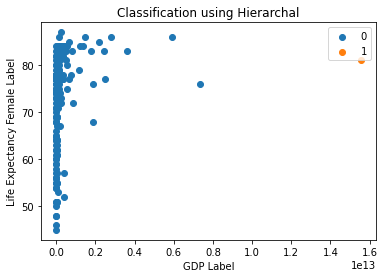

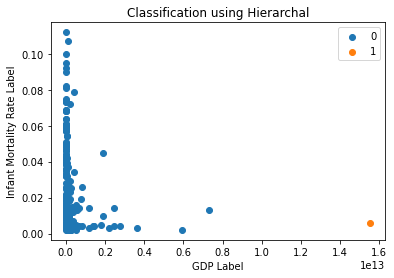

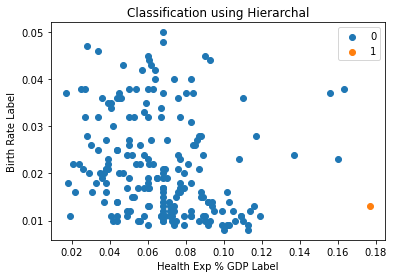

In [77]:
#Task 2 by Veda and Janavi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from mpl_toolkits import mplot3d
from validclust import dunn
from sklearn.metrics import accuracy_score, f1_score
df=pd.read_csv('data/World Indicators-clean.csv')
def create_K_meanselbow_task2(df):
    coordinates=df.loc[:, 'Birth Rate':'Population Urban']
    sse = {}
    silhouette = {}
    opt_k=1
    for i in range(2,15):
        k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
        k_means.fit(coordinates)
        silhouette[i]= metrics.silhouette_score(coordinates, k_means.labels_)
        sse[i]= k_means.inertia_

    max_value = max(silhouette, key=silhouette.get)
    
    k_means=KMeans(n_clusters=max_value,init='k-means++',random_state=42)
    validate_internal(k_means,coordinates, 'K means')
    
    pred_val=k_means.fit_predict(coordinates)
    df['cluster_class']= pred_val
    return df

def validate_internal(cluster, coordinates,method):
    cluster.fit(coordinates)
    print('CH Ratio World Indicators Data for ',method,': '+ str(metrics.calinski_harabasz_score(coordinates, cluster.labels_)))
    dist = metrics.pairwise_distances(coordinates)
    dunnindex = dunn(dist, cluster.labels_)
    print('Dunn Index World Indicators Data for ',method,': '+ str(dunnindex))
    print('\n\n\n\n\n')
def create_hiearchal_Classification_task2(df):
      
    coordinates=df.loc[:, 'Birth Rate':'Population Urban']
    silhouette = {}
    for i in range(2,15):
        hier=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
        silhouette[i]= metrics.silhouette_score(coordinates, hier.fit_predict(coordinates))
    max_value = max(silhouette, key=silhouette.get)
    clusters=AgglomerativeClustering(n_clusters=max_value,affinity='euclidean',linkage='ward')
    validate_internal(clusters, coordinates, 'Hierarchal')
    df['cluster_class']=clusters.fit_predict(coordinates)
    
    return df
def create_2dscatter(data, method,col1,col2):    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("Classification using "+method)
    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        ax.scatter(data2[data.columns[col1]], data2[data.columns[col2]],label=i)
    ax.set_xlabel(data.columns[col1]+' Label')
    ax.set_ylabel(data.columns[col2]+' Label')
    ax.legend()  
df2=create_K_meanselbow_task2(df)

print('List of countries classified as 0 from Kmeans')
print(list(df2.loc[df2['cluster_class']==0]['Country']))
print('\n\n\n\n\n\n\n\n\n')
print('List of countries classified as 1 from Kmeans')
print(list(df2.loc[df2['cluster_class']==1]['Country']))
print('\n\n\n\n\n\n\n\n\n')
create_2dscatter(df2,'KMeans',5,12)
create_2dscatter(df2,'KMeans',5,9)
create_2dscatter(df2,'KMeans',6,1)
df2=create_hiearchal_Classification_task2(df)
print('List of countries classified as 0 from Hierarchal')
print(list(df2.loc[df2['cluster_class']==0]['Country']))
print('\n\n\n\n\n\n\n\n\n')
print('List of countries classified as 1 from Hierarchal')
print(list(df2.loc[df2['cluster_class']==1]['Country']))
create_2dscatter(df2,'Hierarchal',5,12)
create_2dscatter(df2,'Hierarchal',5,9)
create_2dscatter(df2,'Hierarchal',6,1)

